In [37]:
%pip install matplotlib numpy pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)  # training set

test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)  # test set

In [40]:
print(train.head())
print(train.tail())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [41]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### T8


In [42]:
# T8
median_age = train["Age"].median()

print(f"Median of age is {median_age}")

train["Age"] = train["Age"].fillna(train["Age"].median())

Median of age is 28.0


### T9


In [43]:
# T9
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

### T10


In [44]:
features = np.array(train[["Pclass", "Sex", "Age", "Embarked"]].values, dtype=float)
results = np.array(train["Survived"].values, dtype=float)
features, results

(array([[ 3.,  0., 22.,  0.],
        [ 1.,  1., 38.,  1.],
        [ 3.,  1., 26.,  0.],
        ...,
        [ 3.,  1., 28.,  0.],
        [ 1.,  0., 26.,  1.],
        [ 3.,  0., 32.,  2.]]),
 array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
        1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0

In [45]:
learning_rate = 1e-6


def calculate_logistic(h):
    return 1 / (1 + np.exp(-h))


def get_next_theta(theta, x, y):
    error = y - calculate_logistic(np.dot(x, theta))

    diff_theta = x.T.dot(error) * learning_rate

    return diff_theta


def classifier(theta, x):
    solution = calculate_logistic(np.dot(x, theta))

    classifier_result = solution >= 0.5

    solution[classifier_result == True] = 1
    solution[classifier_result == False] = 0

    return solution


def measurement(predicts, actual):
    diff = predicts - actual
    correct = diff == 0

    return np.sum(correct) / actual.shape


def train_logistic_regression(features, results):
    iterations = int(1e4)
    features_with_one = np.insert(features, 0, 1, axis=1)

    starting_theta = np.zeros(features_with_one.shape[1])
    theta = np.copy(starting_theta)
    accuracy_list = []

    for _ in range(iterations):
        theta += get_next_theta(theta, features_with_one, results)
        accuracy = measurement(
            np.array(train["Survived"]), classifier(theta, features_with_one)
        )[0]
        accuracy_list.append(accuracy)

    print(theta)
    print("Training Accuracy:", accuracy_list[-1])

    plt.plot(accuracy_list)
    plt.show()

    return theta

[ 0.60877697 -0.77117063  2.1963073  -0.01308992  0.34021432]
Training Accuracy: 0.7946127946127947


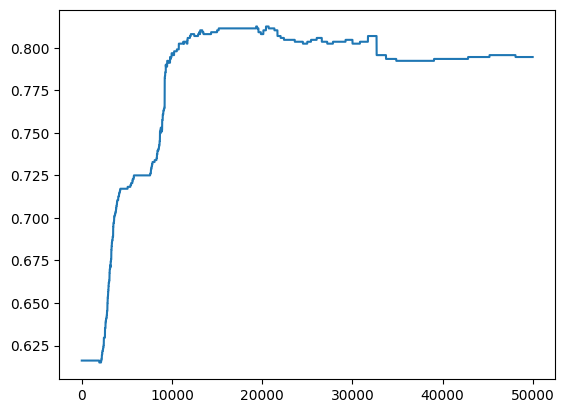

In [46]:
theta = train_logistic_regression(features, results)

In [47]:
# Clean test data
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])

test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

### T11


In [48]:
# T11
test_features = np.array(test[["Pclass", "Sex", "Age", "Embarked"]].values, dtype=float)
test_features = np.insert(test_features, 0, 1, axis=1)

test_result = classifier(theta, test_features)
test_id = test[["PassengerId"]]

df = pd.DataFrame()

df["PassengerId"] = test_id
df["Survived"] = np.array(test_result, dtype=int)

df.to_csv("titanic_result.csv", index=False)

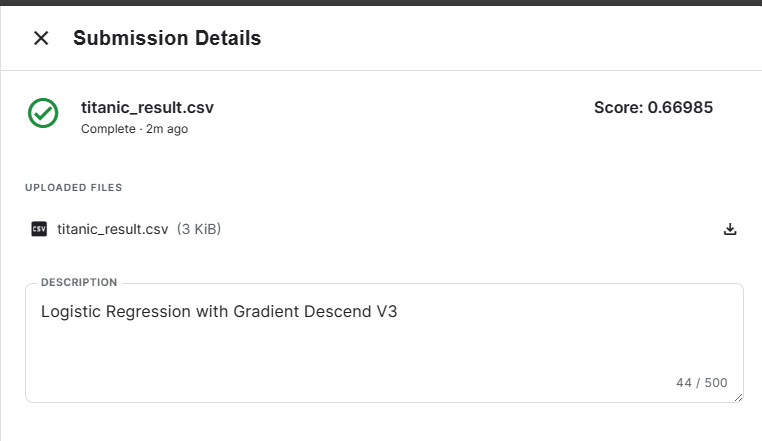


### T12


[ 0.27778632 -0.01063309 -0.23897882  0.22627652  2.13072319 -0.00735009
  0.36545214]
Training Accuracy: 0.8058361391694725


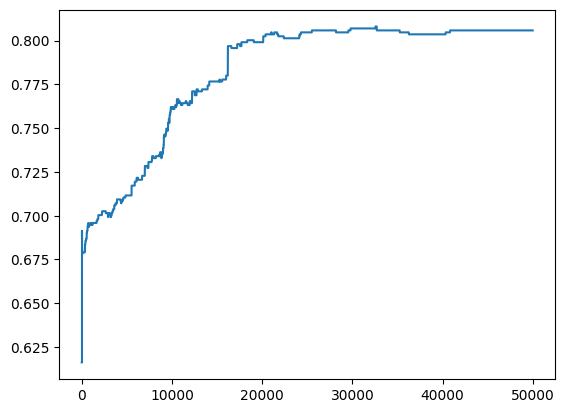

In [49]:
features_with_higher_order = np.insert(features, 0, features[:, 0] ** 2, axis=1)
features_with_higher_order = np.insert(
    features_with_higher_order, 0, features[:, 0] * features[:, 2], axis=1
)

theta_higher_order = train_logistic_regression(features_with_higher_order, results)

In [50]:
test_features = np.array(test[["Pclass", "Sex", "Age", "Embarked"]].values, dtype=float)

test_features_higher_order = np.insert(
    test_features, 0, test_features[:, 0] ** 2, axis=1
)
test_features_higher_order = np.insert(
    test_features_higher_order, 0, test_features[:, 0] * test_features[:, 2], axis=1
)
test_features_higher_order = np.insert(test_features_higher_order, 0, 1, axis=1)

test_result = classifier(theta_higher_order, test_features_higher_order)
test_id = test[["PassengerId"]]

df = pd.DataFrame()

df["PassengerId"] = test_id
df["Survived"] = np.array(test_result, dtype=int)

df.to_csv("titanic_result_higher_order.csv", index=False)

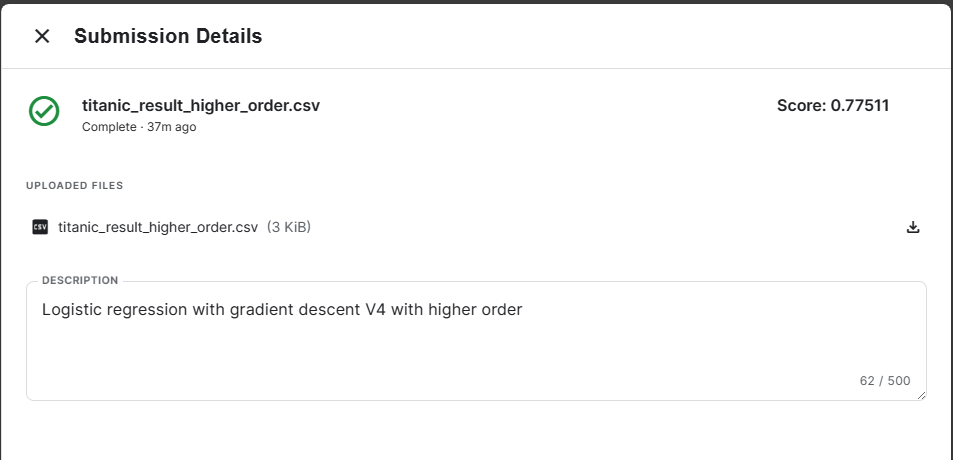


We see that there are little accuracy difference which higher order feature gives more accuracy than normal feature


### T13


[-0.68387827  2.04999267 -0.0178297 ]
Training Accuracy: 0.7867564534231201


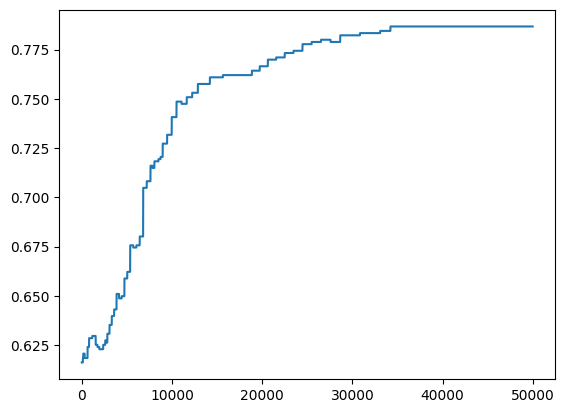

In [51]:
reduced_features = np.array(train[["Sex", "Age"]].values, dtype=float)

theta_reduced = train_logistic_regression(reduced_features, results)

In [52]:
test_features_reduced = np.array(test[["Sex", "Age"]].values, dtype=float)
test_features_reduced = np.insert(test_features_reduced, 0, 1, axis=1)

test_result = classifier(theta_reduced, test_features_reduced)
test_id = test[["PassengerId"]]

df = pd.DataFrame()

df["PassengerId"] = test_id
df["Survived"] = np.array(test_result, dtype=int)

df.to_csv("titanic_result_reduced.csv", index=False)

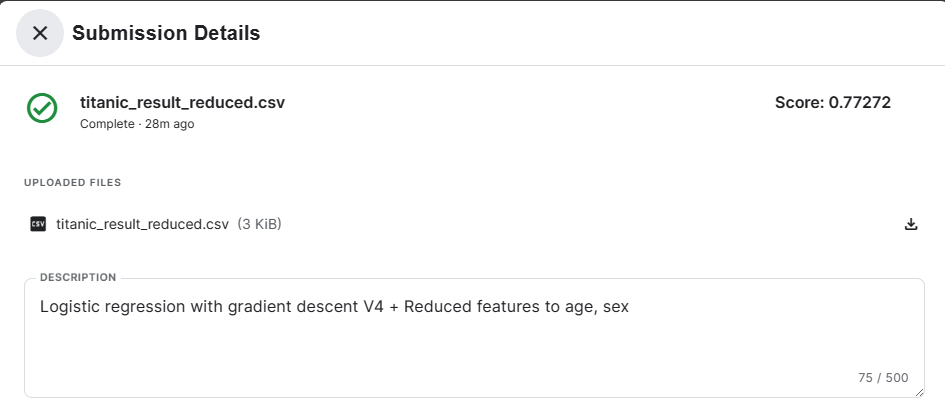


Overall result from reduced features give less accuracy than normal feature or features which has higher order


### OT3


In [78]:
# OT3
learning_rate = 1e-6


def measurement(results, actual):
    size = results.shape[0]
    return np.sum((results - actual) ** 2) / size


def get_next_theta(theta, x, y):
    diff_theta = x.T.dot(y - x.dot(theta)) * learning_rate

    return diff_theta


def train_linear_regression(features, results):
    iterations = int(1e6)
    features_with_one = np.insert(features, 0, 1, axis=1)

    starting_theta = np.zeros(features_with_one.shape[1])
    theta = np.copy(starting_theta)

    accuracy_list = []

    for _ in range(iterations):
        diff_theta = get_next_theta(theta, features_with_one, results)
        theta += diff_theta
        accuracy = measurement(
            np.array(train["Survived"]), np.dot(features_with_one, theta)
        )
        accuracy_list.append(accuracy)

    plt.plot(accuracy_list)
    plt.show()

    print("Mean Square Error:", accuracy_list[-1])
    return theta

Mean Square Error: 0.1449257376613481


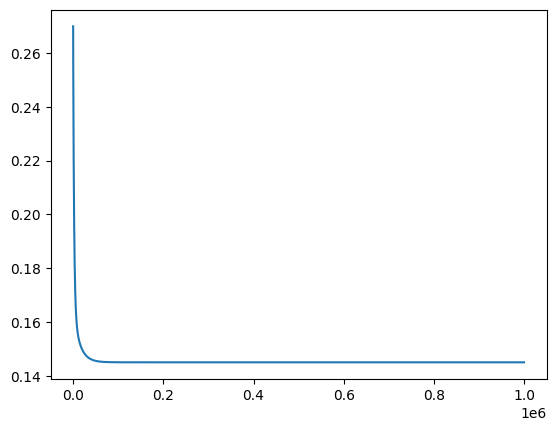

array([ 0.77654442, -0.18843944,  0.49086711, -0.00505436,  0.04911346])

In [79]:
linear_theta = train_linear_regression(features, results)
linear_theta

**Result**

- Mean Square Error: 0.1449257376613481
- Parameter: [ 0.77654442, -0.18843944, 0.49086711, -0.00505436, 0.04911346]


### OT4


In [80]:
# OT4

features_copy = np.insert(features, 0, 1, axis=1)

inverse_props = np.linalg.inv(np.matmul(features_copy.transpose(), features_copy))
linear_reg_theta = np.matmul(
    np.matmul(inverse_props, features_copy.transpose()), results
)

loss = measurement(np.array(train["Survived"]), np.dot(features_copy, linear_reg_theta))

print("Mean Square Error:", loss)
print("Parameter:", linear_reg_theta)

Mean Square Error: 0.14492573766134811
Parameter: [ 0.77654442 -0.18843944  0.49086711 -0.00505436  0.04911346]


**Result**

- Mean Square Error: 0.14492573766134811
- Parameter: [ 0.77654442 -0.18843944 0.49086711 -0.00505436 0.04911346]

which gives the same MSE and parameter value as in OT3
